# Relatório de Análise VII

## Criando Agrupamentos

In [17]:
import pandas as pd

In [18]:
dados = pd.read_csv('Dados/aluguel_residencial.csv', sep=';')

In [19]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


### Estatísticas descritivas

#### https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [20]:
#média geral

dados['Valor'].mean()

5046.172821405663

#### Exemplo da aula

In [21]:
#seguindo o exemplo da aula
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)

In [22]:
dados = dados[selecao]

In [23]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [24]:
grupo_bairro = dados.groupby('Bairro')

In [25]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [26]:
#verificando em quais índices ele encontrou cada uma das variáveis
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [38]:
for bairro, data in grupo_bairro:
    print(f"{bairro} -> {data.Valor.mean()}")

Abolição -> 1195.3333333333333
Alto da Boa Vista -> 3966.6666666666665
Anchieta -> 875.0
Andaraí -> 1464.7113402061855
Anil -> 2048.8732394366198
Arpoador -> 12923.916666666666
Bancários -> 1825.0
Bangu -> 1016.0
Barra da Tijuca -> 7069.552938130986
Barra de Guaratiba -> 5550.0
Benfica -> 996.0
Bento Ribeiro -> 1030.8695652173913
Bonsucesso -> 1225.9322033898304
Botafogo -> 8791.828178694159
Braz de Pina -> 1115.0
Cachambi -> 1157.1742424242425
Cachamorra -> 3000.0
Cacuia -> 916.6666666666666
Caju -> 850.0
Camorim -> 1735.2272727272727
Campinho -> 1037.3333333333333
Campo Grande -> 1267.71714922049
Cascadura -> 948.7096774193549
Catete -> 2267.0625
Catumbi -> 1112.5
Cavalcanti -> 595.0
Centro -> 1254.7521865889212
Cidade Jardim -> 12000.0
Cidade Nova -> 1471.4285714285713
Cocotá -> 1883.3333333333333
Coelho Neto -> 700.0
Colégio -> 885.0
Copacabana -> 4126.677004538578
Cordovil -> 905.5555555555555
Cosme Velho -> 5343.548387096775
Cosmos -> 658.3333333333334
Curicica -> 1514.5657894736

In [39]:
#juntando as médias
grupo_bairro[['Valor', 'Condominio']].mean().round(2)


,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


##### Tentando com todos os bairros

In [35]:
#média por bairro
dados = pd.read_csv('Dados/aluguel_residencial.csv', sep=';')
bairros_todos = dados.Bairro.unique()
bairros_todos

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Piedade', 'Lagoa', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Jardim Sulacap', 'Oswaldo Cruz',
       'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Quintino Bocaiúva', 'Urca', 'Penha',

In [36]:
#agrupando por bairro
grupo_bairro = dados.groupby('Bairro')

In [37]:
#tirando as médias de Valor e Condomínio por bairro:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


## Estatísticas Descritivas

In [40]:
#descrevendo os valores
grupo_bairro['Valor'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.0,425.0,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3967.0,5514.0,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.0,132.0,700.0,812.0,900.0,962.0,1000.0
Andaraí,97.0,1465.0,408.0,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2049.0,1524.0,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1770.0,2203.0,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1261.0,645.0,450.0,900.0,1100.0,1302.0,4500.0
Vista Alegre,16.0,1114.0,200.0,700.0,1012.0,1200.0,1225.0,1400.0


In [41]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


## Análises Gráficas

In [45]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [46]:
#configurando gráficos
plt.rc('figure', figsize = (20,10))


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

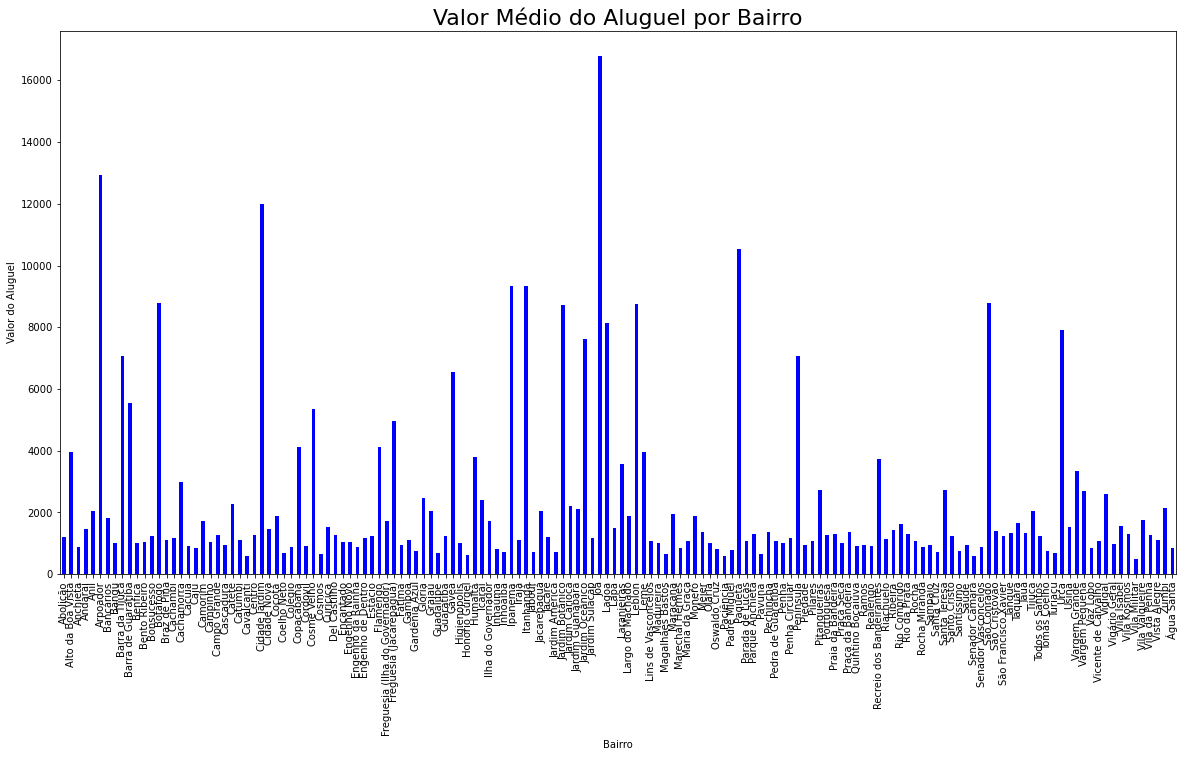

In [48]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})